# Building Frederike's first force field

In [1]:
import matplotlib.pyplot as plt

from ase.io import read,write
from ase.build import bulk
import numpy as np
import ase.db as db
from ase.visualize import view
from ase.optimize import BFGS
Fit_on_forces=True

### Generate training data
Curvature Constrained Splines can be fitted to a reference data-set with energies (and optionally forces) of pre-calculated structures. In this example we generate the reference data-set using a Lennard-Jones potential. We use a LJ bulk structure that we randomly rattle and scale. 


for i in {1..19}; do (mkdir "outcar${i}"; mv "outcar${i}.txt" "outcar${i}/OUTCAR"); done
for i in {1..19}; do (echo "outcar/outcar${i}" >> data_list.txt); done

In [5]:
from ccs_fit.scripts.ccs_build_db import ccs_build_db

ccs_build_db(mode="CCS",DFT_DB="DFT.db",file_list="data_list.txt",overwrite=True)

    Building data-bases: 100%|███████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 69.43it/s]


### Generate the CCS_fit input file; structures.json
The next commands fetch the training-set data from the ASE database containing the LJ structures and the corresponding energies. The reference data is called ``DFT_DB`` since the most common source of reference data is DFT.

In [6]:
from ccs_fit.scripts.ccs_fetch import ccs_fetch

ccs_fetch(mode="CCS",DFT_DB="DFT.db",include_forces=Fit_on_forces)

    Fetching data: 100%|█████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 49.93it/s]


### Fit training data to Curvature Constrained Splines
Finally, the splines are fitted to the target defined in the structures.json input file. The splines can be restricted to be fully repulsive ("rep"), or have a turning point/switch ("sw"), which is defined by the "Swtype" key.


In [7]:
### Generate input.json file
import json

input={
    "General": {
        "interface": "CCS",
        "merging"  : "True"
    },
    "Twobody": {
                "Xx-Xx": {
                        "Rcut": 6.0,
                        "Resolution": 0.5,
                        "Swtype": "rep",
                        "const_type" : "Mono"
                }
        }
}
#SAVE TO FILE
with open('CCS_input.json', 'w') as f:
    json.dump(input, f, indent=8)

In [8]:
#RUN FIT
from ccs_fit import ccs_fit

ccs_fit("CCS_input.json")

    Generating one-body information from training-set.
        Added elements:  ['Co', 'Li', 'Mn', 'Ni', 'O', 'Ta']
    Generating two-body potentials from one-body information.
    Adding pair: Co-Co
    Adding pair: Co-Li
    Adding pair: Co-Mn
    Adding pair: Co-Ni
    Adding pair: Co-O
    Adding pair: Co-Ta
    Adding pair: Li-Li
    Adding pair: Li-Mn
    Adding pair: Li-Ni
    Adding pair: Li-O
    Adding pair: Li-Ta
    Adding pair: Mn-Mn
    Adding pair: Mn-Ni
    Adding pair: Mn-O
    Adding pair: Mn-Ta
    Adding pair: Ni-Ni
    Adding pair: Ni-O
    Adding pair: Ni-Ta
    Adding pair: O-O
    Adding pair: O-Ta
    Adding pair: Ta-Ta
    Applying monotonous constraints for pair:  Co-Co
    Applying monotonous constraints for pair:  Co-Li
    Applying monotonous constraints for pair:  Co-Mn
    Applying monotonous constraints for pair:  Co-Ni


Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json


    Applying monotonous constraints for pair:  Co-O
    Applying monotonous constraints for pair:  Co-Ta
    Applying monotonous constraints for pair:  Li-Li
    Applying monotonous constraints for pair:  Li-Mn
    Applying monotonous constraints for pair:  Li-Ni


Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json


    Applying monotonous constraints for pair:  Li-O
    Applying monotonous constraints for pair:  Li-Ta
    Applying monotonous constraints for pair:  Mn-Mn
    Applying monotonous constraints for pair:  Mn-Ni


Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json


    Applying monotonous constraints for pair:  Mn-O
    Applying monotonous constraints for pair:  Mn-Ta
    Applying monotonous constraints for pair:  Ni-Ni


Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json


    Applying monotonous constraints for pair:  Ni-O
    Applying monotonous constraints for pair:  Ni-Ta


Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json


    Applying monotonous constraints for pair:  O-O
    Applying monotonous constraints for pair:  O-Ta
    Applying monotonous constraints for pair:  Ta-Ta
    Merging intervall for pair Co-Co. Number of knots reduced from 2 to 2. 
    Merging intervall for pair Co-Li. Number of knots reduced from 7 to 6. 
    Merging intervall for pair Co-Mn. Number of knots reduced from 4 to 4. 
    Merging intervall for pair Co-Ni. Number of knots reduced from 8 to 6. 
    Merging intervall for pair Co-O. Number of knots reduced from 10 to 8. 
    Merging intervall for pair Co-Ta. Number of knots reduced from 8 to 5. 
    Merging intervall for pair Li-Li. Number of knots reduced from 9 to 7. 
    Merging intervall for pair Li-Mn. Number of knots reduced from 7 to 6. 
    Merging intervall for pair Li-Ni. Number of knots reduced from 7 to 7. 
    Merging intervall for pair Li-O. Number of knots reduced from 10 to 9. 
    Merging intervall for pair Li-Ta. Number of knots reduced from 7 to 7. 
    Merg

/home/thism292/Documents/repos/CCS_fit/src/ccs_fit/fitting/spline_functions.py:320: RuntimeWarning: invalid value encountered in log
  beta = alpha * r0 + np.log(cc / alpha**2)


    Merging intervall for pair Co-Li. Number of knots reduced from 7 to 6. 
    Merging intervall for pair Co-Mn. Number of knots reduced from 4 to 4. 
    Merging intervall for pair Co-Ni. Number of knots reduced from 8 to 6. 
    Merging intervall for pair Co-O. Number of knots reduced from 10 to 8. 
    Merging intervall for pair Co-Ta. Number of knots reduced from 8 to 5. 
    Merging intervall for pair Li-Li. Number of knots reduced from 9 to 7. 
    Merging intervall for pair Li-Mn. Number of knots reduced from 7 to 6. 
    Merging intervall for pair Li-Ni. Number of knots reduced from 7 to 7. 
    Merging intervall for pair Li-O. Number of knots reduced from 10 to 9. 
    Merging intervall for pair Li-Ta. Number of knots reduced from 7 to 7. 
    Merging intervall for pair Mn-Mn. Number of knots reduced from 2 to 2. 
    Merging intervall for pair Mn-Ni. Number of knots reduced from 8 to 6. 
    Merging intervall for pair Mn-O. Number of knots reduced from 10 to 7. 
    Merging 

    Finding optimum switch: 100%|██████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 56.02it/s]

    The best switch is (2, 6, 4, 6, 8, 5, 7, 6, 7, 9, 7, 2, 6, 7, 5, 7, 10, 8, 9, 9, 3) with mse: 0.52861, corresponding to distances of [5.56 5.5  6.47 5.5  5.61 5.17 5.94 5.58 5.94 6.19 6.14 5.56 5.48 5.07
 5.11 5.97 6.58 6.51 6.67 6.09 6.08] Å for element pairs ['Co-Co', 'Co-Li', 'Co-Mn', 'Co-Ni', 'Co-O', 'Co-Ta', 'Li-Li', 'Li-Mn', 'Li-Ni', 'Li-O', 'Li-Ta', 'Mn-Mn', 'Mn-Ni', 'Mn-O', 'Mn-Ta', 'Ni-Ni', 'Ni-O', 'Ni-Ta', 'O-O', 'O-Ta', 'Ta-Ta'].
    Final root mean square error in energy:  0.008332632936189927  (eV/atoms) [NOTE: Only elements specified in Onebody are considered in atom count!]


### Validate your potential
Make sure your potential (at least) reproduce the data points in your training-set. Performin further tests on strucutres not included in the training-set is recomended but not included in the tutorial.

In [9]:
from ccs_fit.scripts.ccs_validate import ccs_validate
ccs_validate(mode="CCS",CCS_params="CCS_params.json",DFT_DB="DFT.db")

  0%|                                                                                                 | 0/19 [00:00<?, ?it/s]/home/thism292/anaconda3/envs/CCS_fit_search_mode/lib/python3.9/site-packages/ase/utils/__init__.py:62: FutureWarning: Please use atoms.cell.rank instead
  warnings.warn(warning)
100%|████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 24.54it/s]


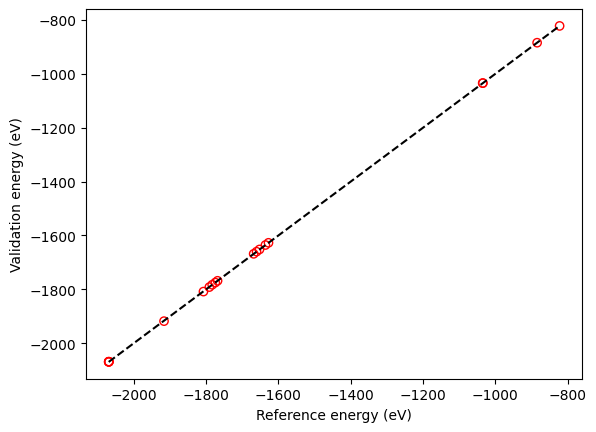

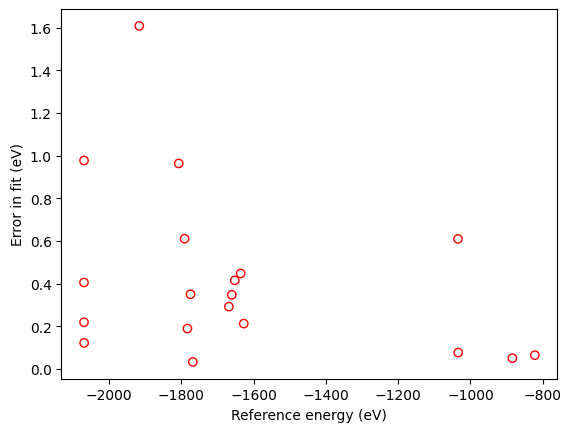

In [10]:
try:
    err=np.loadtxt("CCS_validate.dat")
    plt.xlabel('Reference energy (eV)')
    plt.ylabel('Validation energy (eV)')
    plt.plot( [min(err[:,0]),max(err[:,0])],[min(err[:,0]),max(err[:,0])],'--',color='black'  )
    plt.scatter(err[:,0],err[:,1],facecolors='none', edgecolors='red')
    plt.show()
    plt.xlabel('Reference energy (eV)')
    plt.ylabel('Error in fit (eV)')
    plt.scatter(err[:,0],err[:,2],facecolors='none', edgecolors='red')
    plt.show()
except:
    pass

### Cleaning up

In [11]:
# import glob

# def rm(file):
#     try:
#         os.remove(file)
#     except OSError:
#         pass


# list=glob.glob("CALCULATED_DATA/*")
# for file in list:
#     rm(file)
# list=glob.glob("CCS_*")
# for file in list:
#     rm(file)
# list=glob.glob("UNC_*")
# for file in list:
#     rm(file)
# rm("structures.json")
# rm("file_list")
# rm("LJ.db")

### Running MD

In [3]:
# CCS
from ccs_fit.ase_calculator.ccs_ase_calculator import CCS 
from ase import io
from ase.optimize import FIRE
import json

with open("CCS_params.json", 'r') as f:
    CCS_params = json.load(f)

CCS_calc=CCS(CCS_params=CCS_params)

atoms = io.read("DFT.db@0")
                
atoms.calc = CCS_calc

In [7]:
# Read geometry optimized structure and run NVE Molecular dynamics 
from ase import units
from ase.io import read, write
from ase.io.trajectory import Trajectory
from ase.md import MDLogger
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.nptberendsen import NPTBerendsen
from ase.md.nvtberendsen import NVTBerendsen
from ase.md.verlet import VelocityVerlet
import numpy as np
from ase.io import read, write

rng = np.random.default_rng(10)
MaxwellBoltzmannDistribution(atoms, 873*units.kB, rng=rng)
dt = 0.5 * units.fs
steps = int(10)
dyn = VelocityVerlet(atoms, timestep=dt)
interval = int(1)
dyn.attach(MDLogger(dyn, atoms, 'output.log', mode="a"), interval=interval)
dyn.attach(Trajectory('output.traj', 'a', atoms).write, interval=interval)
dyn.run(steps)

/home/thism292/anaconda3/envs/CCS_fit_search_mode/lib/python3.9/site-packages/ase/md/md.py:48: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))
/home/thism292/anaconda3/envs/CCS_fit_search_mode/lib/python3.9/site-packages/ase/utils/__init__.py:62: FutureWarning: Please use atoms.cell.rank instead
  warnings.warn(warning)


True

In [9]:
!ase gui output.traj

Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/thism292/.local/lib/python3.10/site-packages/ase/gui/pipe.py", line 32, in <module>
    main()
  File "/home/thism292/.local/lib/python3.10/site-packages/ase/gui/pipe.py", line 19, in main
    make_plot(show=False, *data)
  File "/home/thism292/.local/lib/python3.10/site-packages/ase/gui/graphs.py", line 78, in make_plot
    plt.figure(figsize=(basesize * 2.5**0.5, basesize))
  File "/home/thism292/.local/lib/python3.10/site-packages/matplotlib/_api/deprecation.py", line 454, in wrapper
    return func(*args, **kwargs)
  File "/home/thism292/.local/lib/python3.10/site-packages/matplotlib/pyplot.py", line 783, in figure
    manager = new_figure_manager(
  File "/home/thism292/.local/lib/python3.10/site-packages/matplotlib/pyplot.py", 